In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/car data.csv")
df
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

# Load the dataset

# Step 1: Drop 'Car_Name' column
df.drop(columns=['Car_Name'], inplace=True)

# Step 2: Convert 'Year' into 'Car_Age'
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']
df.drop(columns=['Year'], inplace=True)  # Drop original 'Year' column

# Step 3: Encode categorical variables
le = LabelEncoder()
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])  # Label Encoding for Seller_Type
df['Transmission'] = le.fit_transform(df['Transmission'])  # Label Encoding for Transmission
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=False)  # One-Hot Encoding for Fuel_Type

# Display the updated dataset structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Selling_Price     301 non-null    float64
 1   Present_Price     301 non-null    float64
 2   Kms_Driven        301 non-null    int64  
 3   Seller_Type       301 non-null    int64  
 4   Transmission      301 non-null    int64  
 5   Owner             301 non-null    int64  
 6   Car_Age           301 non-null    int64  
 7   Fuel_Type_CNG     301 non-null    bool   
 8   Fuel_Type_Diesel  301 non-null    bool   
 9   Fuel_Type_Petrol  301 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 17.5 KB
None
   Selling_Price  Present_Price  Kms_Driven  Seller_Type  Transmission  Owner  \
0           3.35           5.59       27000            0             1      0   
1           4.75           9.54       43000            0             1      0   
2           7.25       

In [ ]:
a=df['Seller_Type'].nunique()
b=df['Seller_Type'].value_counts()
c=df['Seller_Type'].unique()
print(a)
print(b)
print(c)

2
Seller_Type
0    195
1    106
Name: count, dtype: int64
[0 1]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Kms_Driven'] = scaler.fit_transform(df[['Kms_Driven']])
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Kms_Driven'] = scaler.fit_transform(df[['Kms_Driven']])
df

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Car_Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,3.35,5.59,0.053053,0,1,0,11,False,False,True
1,4.75,9.54,0.085085,0,1,0,12,False,True,False
2,7.25,9.85,0.012813,0,1,0,8,False,False,True
3,2.85,4.15,0.009409,0,1,0,14,False,False,True
4,4.60,6.87,0.083984,0,1,0,11,False,True,False
...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,0.067043,0,1,0,9,False,True,False
297,4.00,5.90,0.119119,0,1,0,10,False,False,True
298,3.35,11.00,0.175043,0,1,0,16,False,False,True
299,11.50,12.50,0.017017,0,1,0,8,False,True,False


EDA

       Selling_Price  Present_Price  Kms_Driven  Seller_Type  Transmission  \
count     301.000000     301.000000  301.000000   301.000000    301.000000   
mean        4.661296       7.628472    0.072967     0.352159      0.867110   
std         5.082812       8.644115    0.077852     0.478439      0.340021   
min         0.100000       0.320000    0.000000     0.000000      0.000000   
25%         0.900000       1.200000    0.029029     0.000000      1.000000   
50%         3.600000       6.400000    0.063063     0.000000      1.000000   
75%         6.000000       9.900000    0.096631     1.000000      1.000000   
max        35.000000      92.600000    1.000000     1.000000      1.000000   

            Owner     Car_Age  
count  301.000000  301.000000  
mean     0.043189   11.372093  
std      0.247915    2.891554  
min      0.000000    7.000000  
25%      0.000000    9.000000  
50%      0.000000   11.000000  
75%      0.000000   13.000000  
max      3.000000   22.000000  


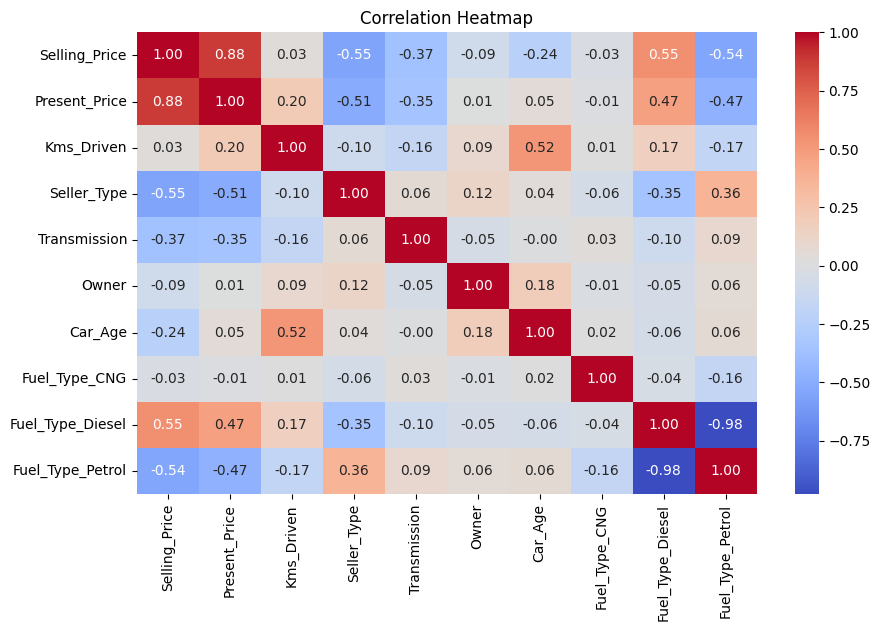

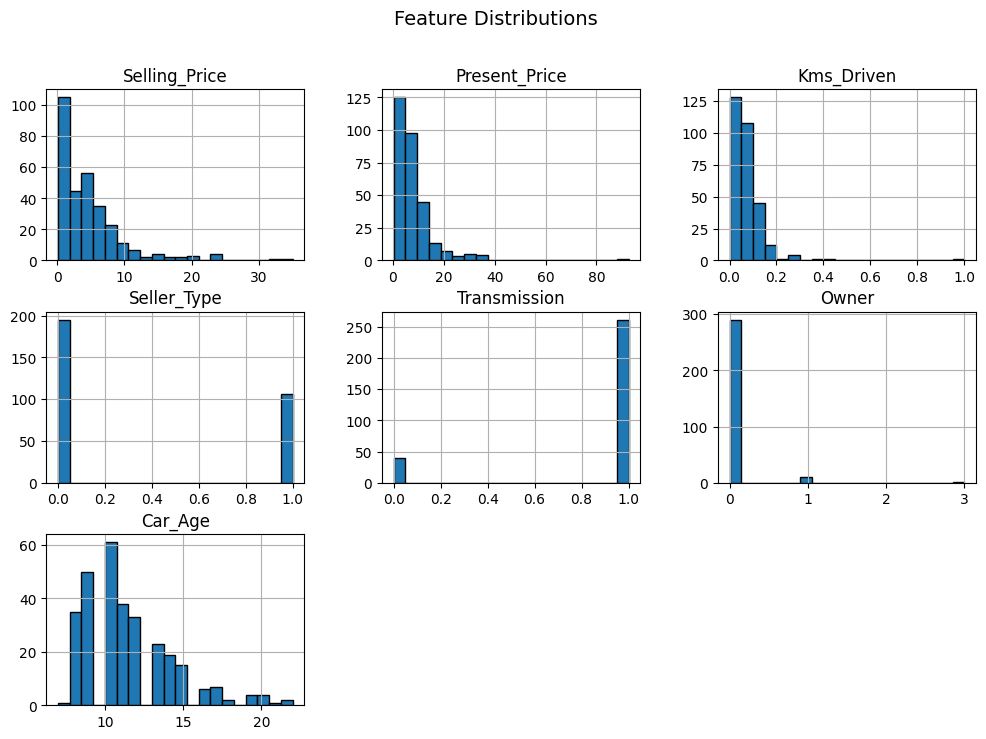

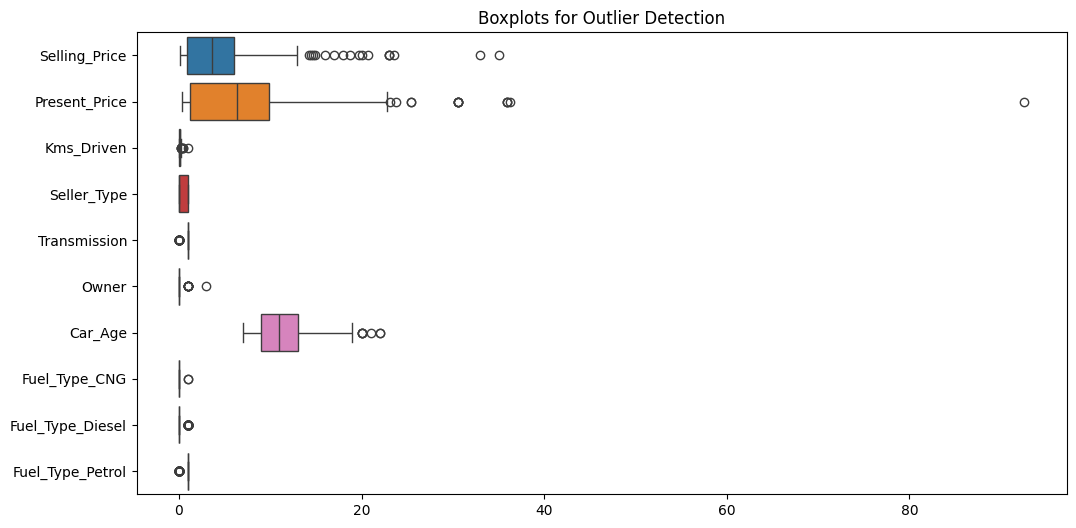

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Step 5: Exploratory Data Analysis (EDA)
# Statistical Summary
print(df.describe())

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Numerical Features
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Boxplots for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots for Outlier Detection")
plt.show()

In [ ]:
# Outlier Handling using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers for numerical features
df = remove_outliers(df, 'Selling_Price')
df = remove_outliers(df, 'Present_Price')
df = remove_outliers(df, 'Kms_Driven')
df = remove_outliers(df, 'Car_Age')
df

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Car_Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,3.35,5.59,0.053053,0,1,0,11,False,False,True
1,4.75,9.54,0.085085,0,1,0,12,False,True,False
2,7.25,9.85,0.012813,0,1,0,8,False,False,True
3,2.85,4.15,0.009409,0,1,0,14,False,False,True
4,4.60,6.87,0.083984,0,1,0,11,False,True,False
...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,0.067043,0,1,0,9,False,True,False
297,4.00,5.90,0.119119,0,1,0,10,False,False,True
298,3.35,11.00,0.175043,0,1,0,16,False,False,True
299,11.50,12.50,0.017017,0,1,0,8,False,True,False


       Selling_Price  Present_Price  Kms_Driven  Seller_Type  Transmission  \
count     272.000000     272.000000  272.000000   272.000000    272.000000   
mean        3.778125       5.980919    0.062175     0.363971      0.919118   
std         3.080785       4.794348    0.040591     0.482027      0.273157   
min         0.100000       0.320000    0.000000     0.000000      0.000000   
25%         0.750000       0.990000    0.029029     0.000000      1.000000   
50%         3.350000       5.800000    0.059813     0.000000      1.000000   
75%         5.750000       9.400000    0.089089     1.000000      1.000000   
max        12.900000      20.450000    0.183650     1.000000      1.000000   

            Owner     Car_Age  
count  272.000000  272.000000  
mean     0.036765   11.113971  
std      0.188530    2.450594  
min      0.000000    7.000000  
25%      0.000000    9.000000  
50%      0.000000   10.500000  
75%      0.000000   12.250000  
max      1.000000   19.000000  


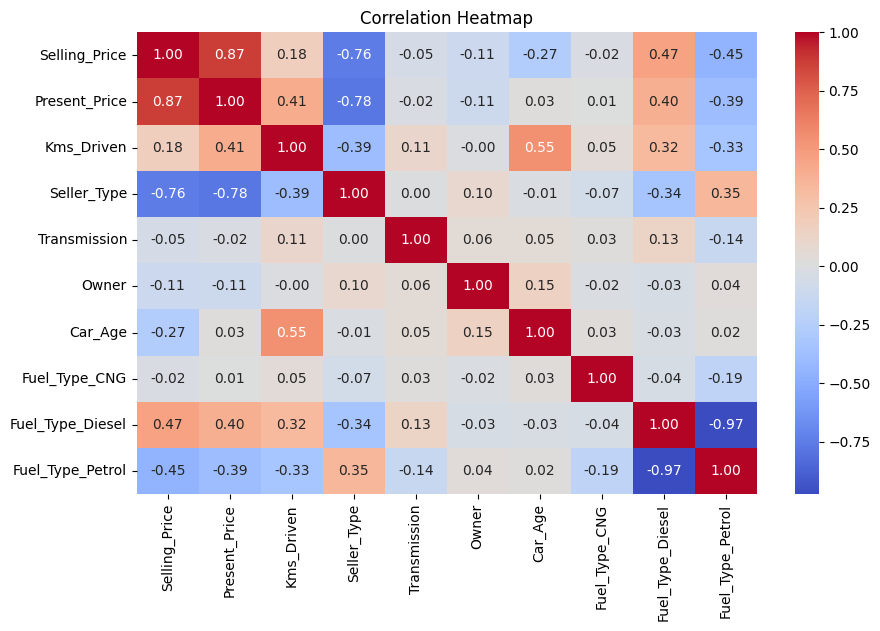

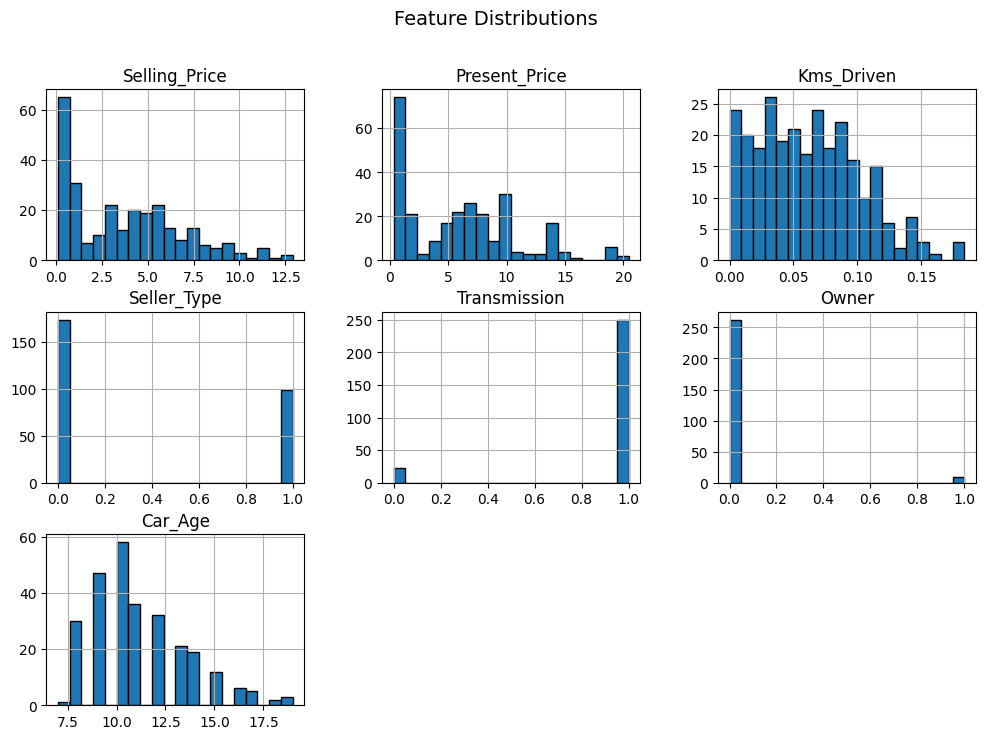

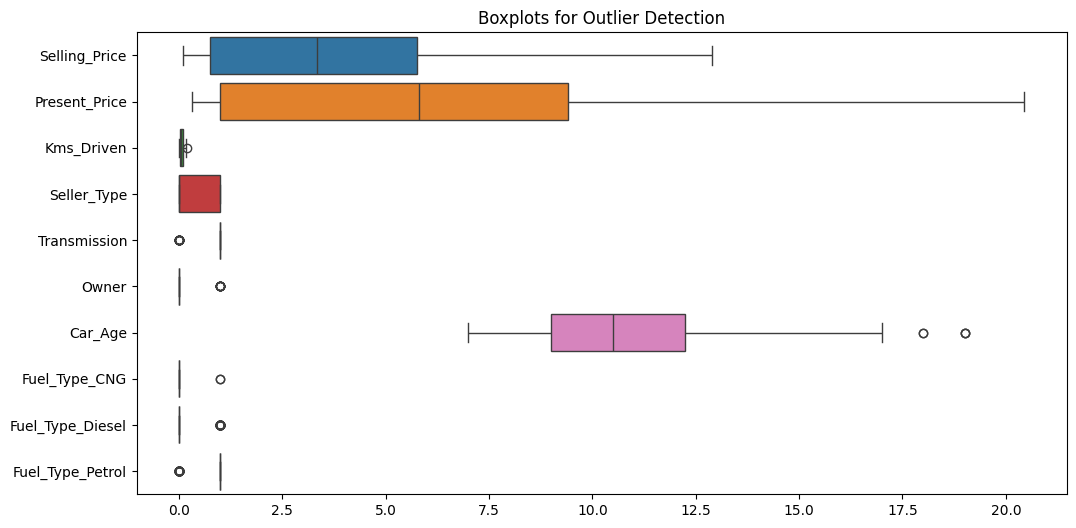

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Step 5: Exploratory Data Analysis (EDA)
# Statistical Summary
print(df.describe())

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Numerical Features
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Boxplots for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots for Outlier Detection")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#  Split Data into Training and Testing Sets
X = df.drop(columns=['Selling_Price'])  # Features
y = df['Selling_Price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train a Baseline Model (Linear Regression)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#  Model Evaluation
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

# Print model performance
print("Linear Regression Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

print(f"R² Score: {r2:.2f}")

Linear Regression Model Performance:
MAE: 0.72
MSE: 1.20
R² Score: 0.89


In [ ]:
from sklearn.ensemble import RandomForestRegressor
#  Train a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#  Model Evaluation
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

# Print model performance
print("Random Forest Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

print(f"R² Score: {r2:.2f}")

Random Forest Model Performance:
MAE: 0.47
MSE: 0.55
R² Score: 0.95


In [ ]:
import joblib
joblib.dump(rf_model, 'car_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
!pip install streamlit -q


In [ ]:
import streamlit as st
import joblib
import numpy as np

# Load the trained model and scaler
model = joblib.load("car_price_model.pkl")
scaler = joblib.load("scaler.pkl")

# Streamlit UI
st.title("Car Price Prediction 🚗💰")
st.write("Enter car details to predict the selling price.")

# User input fields
present_price = st.number_input("Present Price (in Lakhs)", min_value=0.0, format="%.2f")
kms_driven = st.number_input("Kilometers Driven", min_value=0)
owner = st.selectbox("Number of Previous Owners", [0, 1, 2, 3])
car_age = st.number_input("Car Age (in years)", min_value=0)
seller_type = st.selectbox("Seller Type", ["Dealer", "Individual"])
transmission = st.selectbox("Transmission Type", ["Manual", "Automatic"])
fuel_type = st.selectbox("Fuel Type", ["Petrol", "Diesel", "CNG"])

# Encode categorical values
seller_type = 1 if seller_type == "Individual" else 0
transmission = 1 if transmission == "Automatic" else 0
fuel_type_cng = 1 if fuel_type == "CNG" else 0
fuel_type_diesel = 1 if fuel_type == "Diesel" else 0
fuel_type_petrol = 1 if fuel_type == "Petrol" else 0

# Scale 'Kms_Driven'
kms_driven_scaled = scaler.transform(np.array([[kms_driven]]))[0][0]

# Prepare input for prediction
features = np.array([[present_price, kms_driven_scaled, owner, seller_type, transmission, car_age, fuel_type_cng, fuel_type_diesel]])

# Predict button
if st.button("Predict Price"):
    prediction = model.predict(features)[0]

2025-02-22 07:36:41.729 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 07:36:41.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 07:36:41.733 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 07:36:41.736 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 07:36:41.738 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 07:36:41.740 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 07:36:41.742 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-22 07:36:41.744 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!wget -q -O - ipv4.icanhazip.com

8000
34.138.12.0


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

y


⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.138.12.0:8501

⠸⠼⠴⠦⠧⠇your url is: https://sixty-kiwis-jog.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/pyth